PHASE 1 PROJECT

Project Overview
For this project, you will use data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder.

Importing Necessary Libraries

Import standard packages using the standard alias


In [472]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Loading the Dataset

Reading the CSV file


In [473]:
df = pd.read_csv(r'C:\Users\DELL\Documents\Moringa\Phase1\PROJECT_Av\Project_Avi\AviationData.csv', encoding='ISO-8859-1')
df.head()





c:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Drop columns with excessive missing values

Removes columns with more than 50% missing values

In [474]:
df.dropna(axis=1, thresh=int(0.5 * len(df)), inplace=True)

df = df.dropna(subset=['Broad.phase.of.flight'])


 Filling missing categorical values with 'Unknown'

Replaces all missing values in the dataset with "Unknown"

In [475]:
df["Engine.Type"].fillna("Unknown", inplace=True)
df["Weather.Condition"].fillna("Unknown", inplace=True)
df["Purpose.of.flight"].fillna("Unknown", inplace=True)
df["Registration.Number"].fillna("Unknown", inplace=True)
df["Airport.Name"].fillna("Unknown", inplace=True)
df["Airport.Code"].fillna("Unknown", inplace=True)
df["Country"].fillna("Unknown", inplace=True)
df["Location"].fillna("Unknown", inplace=True)
df["Injury.Severity"].fillna("Unknown", inplace=True)
df["Report.Status"].fillna("Unknown", inplace=True)
df["Publication.Date"].fillna("Unknown", inplace=True)
df["Amateur.Built"].fillna("Unknown", inplace=True)
df["Aircraft.damage"].fillna("Unknown", inplace=True)


Replacing "Unknown" Values with the Mode

In [476]:
mode_value = df["Broad.phase.of.flight"].mode()[0]  # Find mode
df["Broad.phase.of.flight"].replace("Unknown", mode_value, inplace=True)

Drop Duplicates

In [477]:
df.drop_duplicates(inplace=True)

Filling Numeric Columns with Median Values

Replaces missing values in numerical columns with their median values.

In [478]:
df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].median(), inplace=True)
df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].median(), inplace=True)
df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].median(), inplace=True)
df['Total.Uninjured'].fillna(df['Total.Uninjured'].median(), inplace=True)
df['Number.of.Engines'].fillna(df['Number.of.Engines'].median(), inplace=True)
df['Make'].fillna(df['Make'].mode()[0], inplace=True)
df['Model'].fillna(df['Model'].mode()[0], inplace=True)

Checking for Missing Values After Cleaning

Displays the count of missing values in each column.

In [479]:
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

Dataset Information

Prints information about the dataset

In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61724 entries, 0 to 63911
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                61724 non-null  object 
 1   Investigation.Type      61724 non-null  object 
 2   Accident.Number         61724 non-null  object 
 3   Event.Date              61724 non-null  object 
 4   Location                61724 non-null  object 
 5   Country                 61724 non-null  object 
 6   Airport.Code            61724 non-null  object 
 7   Airport.Name            61724 non-null  object 
 8   Injury.Severity         61724 non-null  object 
 9   Aircraft.damage         61724 non-null  object 
 10  Registration.Number     61724 non-null  object 
 11  Make                    61724 non-null  object 
 12  Model                   61724 non-null  object 
 13  Amateur.Built           61724 non-null  object 
 14  Number.of.Engines       61724 non-null

Checking First Few Rows Again

In [481]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Unknown,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,Unknown
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Unknown,Fatal(4),Destroyed,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Landing,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Unknown,Unknown,Fatal(3),Destroyed,...,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Unknown,Unknown,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Unknown,Unknown,Fatal(1),Destroyed,...,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980


Grouping Data

Finding what aircraft cause the most total fatal injuries

Groups by aircraft make and model, then sums fatal injuries and sorts in descending order.

In [482]:
df.groupby(['Make','Model'])['Total.Fatal.Injuries'].sum().sort_values(ascending=False)

Make                 Model       
Cessna               172N            351.0
                     152             342.0
Piper                PA-28-181       327.0
                     PA-28-140       272.0
Airbus Industrie     A300B4-605R     266.0
                                     ...  
Lingwall             Rebich-Pitts      0.0
Lindstrand Balloons  LBL               0.0
                     90A               0.0
                     77A               0.0
1200                 G103              0.0
Name: Total.Fatal.Injuries, Length: 12027, dtype: float64

Groups by aircraft make and model, then counts occurrences of fatal injuries

In [483]:
df.groupby(['Make','Model'])['Total.Fatal.Injuries'].count().sort_values(ascending=False)

Make    Model     
Cessna  152           2116
        172           1016
        172N           975
Piper   PA-28-140      794
Cessna  150            664
                      ... 
Maule   MX-7-180AC       1
        MX 7-235         1
        MT7-235          1
        MT-7-420         1
1200    G103             1
Name: Total.Fatal.Injuries, Length: 12027, dtype: int64



Counting Total Accidents

In [484]:
accident_number = df['Accident.Number'].count()

print(f'the total number of accidents were {accident_number}')

the total number of accidents were 61724


Identifying the Aircraft Model with the Highest Accidents

Finds the aircraft model with the highest number of accidents

In [485]:
df.groupby(['Make','Model'])['Accident.Number'].count().sort_values(ascending=False)

# The cessna model 152 had the highest accident number

Make    Model     
Cessna  152           2116
        172           1016
        172N           975
Piper   PA-28-140      794
Cessna  150            664
                      ... 
Maule   MX-7-180AC       1
        MX 7-235         1
        MT7-235          1
        MT-7-420         1
1200    G103             1
Name: Accident.Number, Length: 12027, dtype: int64

Fatal Injuries by Aircraft Type

Aggregates fatal injuries by aircraft type and displays the top 10

In [486]:
df.groupby(['Make','Model'])['Total.Fatal.Injuries'].agg(['sum', 'count']).sort_values(by='sum', ascending=False).head(10)
# the boeing

sum  count
Make             Model                    
Cessna           172N         351.0    975
                 152          342.0   2116
Piper            PA-28-181    327.0    456
                 PA-28-140    272.0    794
Airbus Industrie A300B4-605R  266.0      3
Piper            PA-28-180    236.0    494
Boeing           747-131      230.0      3
                 747-300      229.0      5
Beech            A36          214.0    267
Cessna           172P         209.0    582

Minor Injuries by Aircraft Type

Aggregates minor injuries by aircraft type and displays the top 10

In [487]:
df.groupby(['Make','Model'])['Total.Minor.Injuries'].agg(['sum', 'count']).sort_values(by='sum', ascending=False).head(10)
# The cessna model 152 had the highest number of minor injuries

sum  count
Make              Model                  
Cessna            152        403.0   2116
Piper             PA-28-140  372.0    794
Cessna            172N       317.0    975
                  172        292.0   1016
Mcdonnell Douglas DC-10-10   280.0     35
Boeing            747-122    265.0      9
Cessna            172M       219.0    640
                  172P       198.0    582
Bell              206B       175.0    391
Cessna            150        175.0    664

Serious Injuries by Aircraft Type

Aggregates serious injuries by aircraft type and displays the top 10

In [488]:
df.groupby(['Make','Model'])['Total.Serious.Injuries'].agg(['sum', 'count']).sort_values(by='sum', ascending=False).head(10)

sum  count
Make   Model                  
Piper  PA-28-140  215.0    794
Cessna 152        159.0   2116
       172N       146.0    975
       172        132.0   1016
       172M       132.0    640
Piper  PA-28-180  130.0    494
Bell   206B       126.0    391
Piper  PA-28-181  102.0    456
       PA-32-300   99.0    318
Cessna 150         96.0    664

Fatal Injuries by Purpose of Flight

Groups fatal injuries by flight purpose and sorts in descending order.

In [489]:
df.groupby('Purpose.of.flight')['Total.Fatal.Injuries'].sum().sort_values(ascending=False)

Purpose.of.flight
Personal                     13465.0
Unknown                       5592.0
Business                      1819.0
Instructional                 1286.0
Positioning                    446.0
Aerial Application             375.0
Executive/corporate            331.0
Public Aircraft                279.0
Other Work Use                 274.0
Aerial Observation             197.0
Skydiving                      186.0
Ferry                          174.0
Flight Test                     42.0
Air Race/show                   30.0
Public Aircraft - Federal       10.0
Banner Tow                       4.0
Public Aircraft - Local          2.0
Glider Tow                       2.0
External Load                    2.0
Public Aircraft - State          2.0
Air Drop                         1.0
Firefighting                     0.0
Name: Total.Fatal.Injuries, dtype: float64

Aircraft Damage Counts

In [490]:
df['Aircraft.damage'].value_counts()

Substantial    43668
Destroyed      14885
Minor           1713
Unknown         1458
Name: Aircraft.damage, dtype: int64

Aircraft Damage by Manufacturer

Groups aircraft damage data by make and model.

In [491]:
df.groupby(['Make','Model'])['Aircraft.damage'].count().sort_values(ascending=False)

Make    Model     
Cessna  152           2116
        172           1016
        172N           975
Piper   PA-28-140      794
Cessna  150            664
                      ... 
Maule   MX-7-180AC       1
        MX 7-235         1
        MT7-235          1
        MT-7-420         1
1200    G103             1
Name: Aircraft.damage, Length: 12027, dtype: int64

Aircraft Damage by Weather Condition

Groups aircraft damage data by make and model.

In [492]:
df.groupby('Weather.Condition')['Aircraft.damage'].count()

Weather.Condition
IMC         4715
UNK          546
Unknown       53
VMC        56410
Name: Aircraft.damage, dtype: int64

Graph For Aircraft Damage by Weather Condition

Creates a bar chart of aircraft damage frequency based on weather conditions.



<function matplotlib.pyplot.show(close=None, block=None)>

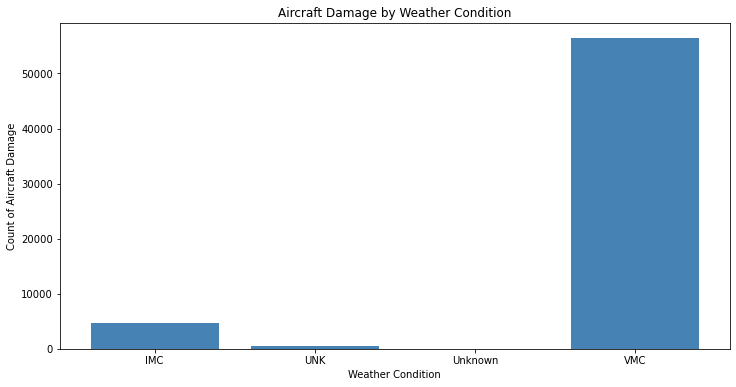

In [493]:
damage_by_weather = df.groupby('Weather.Condition')['Aircraft.damage'].count()

plt.figure(figsize=(12, 6))
plt.bar(damage_by_weather.index, damage_by_weather.values, color='steelblue')
plt.xlabel('Weather Condition')
plt.ylabel('Count of Aircraft Damage')
plt.title('Aircraft Damage by Weather Condition')   
plt.show

Counting Accidents by Phase of Flight

In [494]:
df['Broad.phase.of.flight'].value_counts()

Landing        15976
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Other            119
Name: Broad.phase.of.flight, dtype: int64

Accidents by Phase of Flight


Creates a bar chart for accidents categorized by flight phase

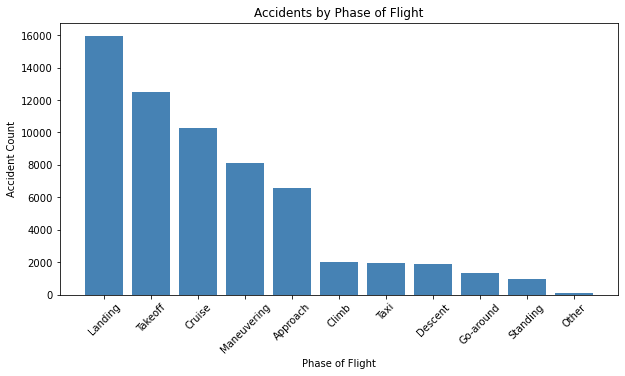

In [495]:
flight_phase_counts = df["Broad.phase.of.flight"].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(flight_phase_counts.index, flight_phase_counts.values, color="steelblue")
plt.xticks(rotation=45)
plt.xlabel("Phase of Flight")
plt.ylabel("Accident Count")
plt.title("Accidents by Phase of Flight")
plt.show()

Calculate total casualties per aircraft type

Computes total casualties and visualizes top aircraft models with the most casualties.

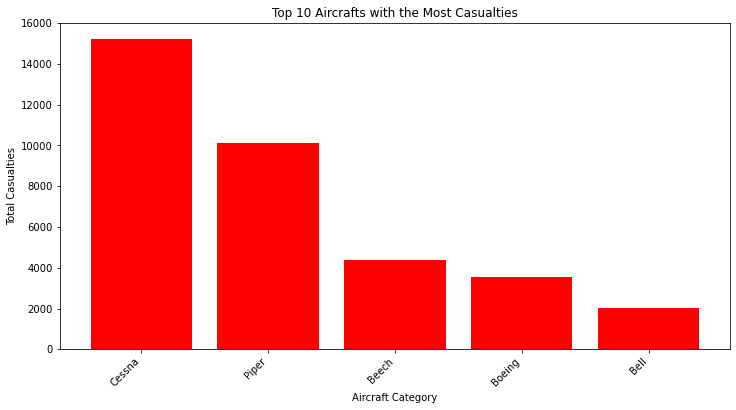

In [496]:
df["Total.Casualties"] = df["Total.Fatal.Injuries"] + df["Total.Serious.Injuries"] + df["Total.Minor.Injuries"]

# Group by aircraft type and sum casualties
casualties_by_aircraft = df.groupby("Make")["Total.Casualties"].sum().sort_values(ascending=False).head()  



plt.figure(figsize=(12, 6))
plt.bar(casualties_by_aircraft.index, casualties_by_aircraft.values, color="red")

# Labels & Title
plt.xlabel("Aircraft Category")
plt.ylabel("Total Casualties")
plt.title("Top 10 Aircrafts with the Most Casualties")
plt.xticks(rotation=45, ha="right")  # Rotate labels for better visibility

# Show plot
plt.show()


Save the Cleaned Data

In [497]:
df.to_csv('cleaned_aviation_data.csv', index=False)
